Работа с временными данными в Pandas является важной частью анализа данных, особенно в задачах, связанных с временными рядами. В этой лекции мы рассмотрим основные аспекты работы с временными данными в Pandas, начиная с их загрузки и преобразования, до выполнения операций агрегации и ресемплинга.

## 1. Создание и загрузка временных данных

Pandas поддерживает различные форматы временных данных. Чаще всего данные загружаются из CSV-файлов или других источников, где одна из колонок содержит даты или временные метки.

In [1]:
import pandas as pd

In [2]:
# создание временной метки
date = pd.to_datetime('2024-01-01')
print(date)

2024-01-01 00:00:00


In [3]:
print(type(date))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [20]:
# Чтение данных с датами из CSV
data = pd.read_csv(r"C:\Users\vahahat\Downloads\Brent Spot Price.csv",sep=',')
data.head()

,"date,""Brent crude oil spot price, Monthly (dollars per barrel)"""
1990 01,21.251
1990 02,19.813
1990 03,18.387
1990 04,16.612
1990 05,16.352


In [ ]:
# Аргумент parse_dates указывает Pandas автоматически преобразовать столбец с датами в объект типа Datetime.

### 2. Индексация с использованием дат

Для работы с временными рядами важно установить даты как индекс. Это позволяет использовать мощные функции для работы с временными данными, такие как ресемплинг и агрегация.

In [22]:
# data.set_index('date', inplace=True)
# data.head()

### 3. Основные операции с временными данными

In [ ]:
# Извлечение года, месяца, дня недели
data['year'] = data.index.year
data['month'] = data.index.month
data['day_of_week'] = data.index.day_name()
print(data.head())

In [ ]:
# Фильтрация данных за определенный год
data_2023 = data['2023']
print(data_2023)

In [ ]:
# Фильтрация по диапазону дат
data_range = data['2023-01-01':'2023-06-30']
print(data_range)

### Ресемплинг данных

Ресемплинг — это изменение частоты временных данных. Например, можно преобразовать данные с дневной частоты на ежемесячную.

In [ ]:
# Ресемплинг данных до месячной частоты, суммируя значения
monthly_data = data.resample('M').sum()
print(monthly_data)


In [23]:
# Популярные параметры для ресемплинга:

# 'D': дневная частота
# 'M': месячная частота
# 'Y': годовая частота
# 'H': часовая частота
# 'T': минутная частота

In [ ]:
# Среднее значение для каждой недели
weekly_mean = data.resample('W').mean()
print(weekly_mean)
# sum(), mean(), min(), max().

## Работа с отсутствующими значениями (NaN) после ресемплинга

После ресемплинга могут появляться пропуски в данных. Pandas предоставляет методы для работы с такими пропусками, такие как заполнение предыдущими значениями или линейная интерполяция.

In [ ]:
# Заполнение пропусков предыдущим значением
filled_data = data.resample('D').ffill()

# Линейная интерполяция
interpolated_data = data.resample('D').interpolate()


## Поддержка временных интервалов

Pandas поддерживает работу с временными интервалами (длительностью), что полезно при анализе длительности событий.

In [24]:
# Создание временных интервалов
start_time = pd.to_datetime('2024-01-01 08:00')
end_time = pd.to_datetime('2024-01-01 10:00')

# Продолжительность
duration = end_time - start_time
print(duration)


0 days 02:00:00


In [ ]:
# Оперирование с временными сдвигами

Pandas позволяет сдвигать временные ряды на определенное количество временных единиц. Это часто используется для вычисления скользящих средних или других индикаторов.

In [ ]:
# Сдвиг данных на один день вперед
shifted_data = data.shift(1)

# Вычисление разницы между текущим и предыдущим днем
data['daily_change'] = data['value'] - data['value'].shift(1)

In [ ]:
# Скользящее среднее по 7 дням
data['7_day_avg'] = data['value'].rolling(window=7).mean()
print(data.head())


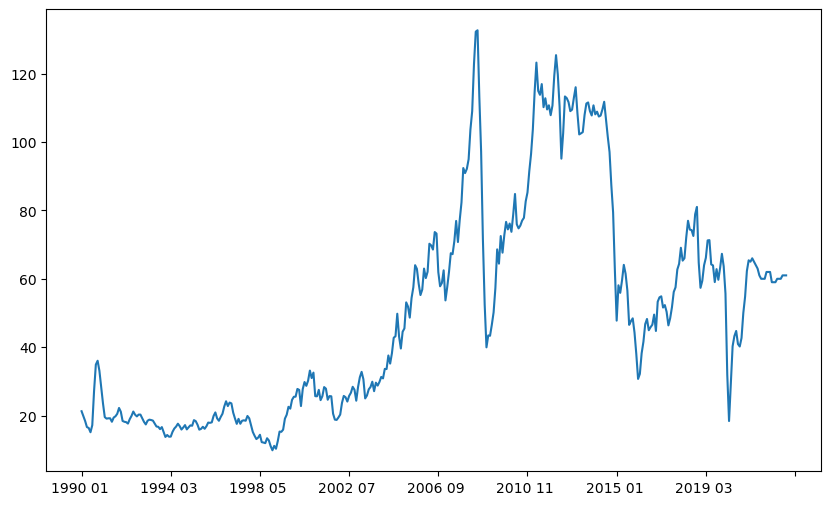

In [27]:
import matplotlib.pyplot as plt

# Построение графика временных данных
data['date,"Brent crude oil spot price, Monthly (dollars per barrel)"'].plot(figsize=(10, 6))
plt.show()


Ошибка преобразования даты: Если в данных присутствуют неправильные форматы даты, можно использовать параметр errors='coerce' при преобразовании даты.


In [ ]:
# data['date_column'] = pd.to_datetime(data['date_column'], errors='coerce')

In [ ]:
# ffill(), bfill() или interpolate()